# Plotting LFP and spikes

### 0. Imports

In [1]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 1. Plotting functions

In [16]:
def plot_lfps(
    data,                   # pd dataframe to take data from
    csc_nrs,                # channel IDs for LFP data
    start,                  # start time in ms
    stop,                   # stop time in ms
    x_name="movie_times",   # df column name for labels for x axis
    y_name="filtered"       # df column name of LFP data
):
    
    data = data.copy()
    
    len_c = len(csc_nrs)
    lst_c = list(range(len_c))

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    lfp_colors = []
    for i in range(len_c):
        lfp_colors.append('#%06X' % randint(0, 0xFFFFFF))

    ## set up frame for data ##

    fig, axs = plt.subplots(len_c,1, figsize=(16,len_c*2))

    for i in lst_c: 
        ## data ##
        cs = csc_nrs[i]
        movie_times = data[(data['csc_nr']== cs)][x_name].to_numpy()[0][start:stop]#S/1000
        lfp_dt = data[(data['csc_nr']== cs)][y_name].to_numpy()[0][start:stop]
        #df_lfp_i = df_lfps[(df_lfps['csc_nr']== cs) & (df_lfps['timestamps'] > lfp_time_start) & (df_lfps['timestamps'] < lfp_time_end)]

        ## fig prep ##
        axs[i].set_title(f'csc_nr : {cs}', fontweight='bold')
        axs[i].set_xlabel('movie times [s]', fontweight='light')
        axs[i].set_ylabel('voltage', fontweight='light')

        ## plot ##
        axs[i].plot(movie_times, lfp_dt, color=lfp_colors[i])

    plt.subplots_adjust(hspace=0.75)
    
    return fig
    
    

def plot_spikes(
    data,                   # pd dataframe (df) to take data from
    unit_idx,               # indices for spike data
    start,                  # start time in ms
    stop,                   # stop time in ms
    x_times,                # labels for x axis
    y_name                  # column name of spike data
):

    data = data.copy()
    
    len_u = len(unit_idx)
    lst_u = list(range(len_u))
    spike_linelengths=[0.5] * len_u

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    spike_colors = []
    for i in range(len_u):
        spike_colors.append('#%06X' % randint(0, 0xFFFFFF))


    ## set up frame for data ##

    fig, axs = plt.subplots(1,1, figsize=(16,len_u*0.75))
    axs.set_yticks(lst_u)
    axs.set_yticklabels(data["unit_id"][unit_idx])
    axs.set_ylabel('units', fontweight='light')
    axs.set_xlabel('recording time', fontweight='light')
    axs.set_title('spikes selected by index', fontweight='bold')


    ## get data ##

    plt_spike_dt_time = []
    min_time = 1000000000000000
    max_time = 0
    for i in unit_idx: 
        if y_name=="bin1_cnt":
            c_spike_times = x_times[i][start:stop][
                (data[y_name][i][start:stop]).astype(dtype=bool)
            ]
        plt_spike_dt_time.append(c_spike_times)
        if len(c_spike_times) != 0:
            c_min = min(plt_spike_dt_time[-1])
            c_max = max(plt_spike_dt_time[-1])
            min_time = c_min if (c_min<min_time) else min_time
            max_time = c_max if (c_max>max_time) else max_time


    ## plot data ##

    axs.eventplot(plt_spike_dt_time, color=spike_colors, linelengths=spike_linelengths)

    for i in lst_u: 
        axs.plot([min_time, max_time], [i, i], "black", linewidth=0.2)
        
    return fig


        
def plot_lfp_with_spikes(
    lfps,            # pd dataframe (df) to take lfp data from
    spikes,          # pd dataframe (df) to take spike data from
    csc_nrs,         # channel IDs for LFP data
    start,           # start time in ms
    stop,            # stop time in ms
    x_name,          # labels for x axis taken from lfp df
    y_lfp,           # df column name of LFP data
    y_spike          # column name of spike data
): 

    lfps = lfps.copy()
    spikes = spikes.copy()
    
    x_times = lfps[x_name]
    unit_idx = lfps.index[lfps["csc_nr"].isin(csc_nrs)].to_numpy()
    
    len_c = len(csc_nrs)
    lst_c = list(range(len_c))
    
    #len_u = len(unit_idx)
    #lst_u = list(range(len_u))
    spike_linelength = 1.25

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    lfp_colors = []
    for i in range(len_c):
        lfp_colors.append('#%06X' % randint(0, 0xFFFFFF))
        
    ## set up frame for data ##

    fig, axs = plt.subplots(len_c,1, figsize=(16,len_c*2+2))
    fig.suptitle("LFP data and spikes for different channels", fontweight='bold', fontsize=20)
    fig.supxlabel('movie times [s]', fontweight='light', fontsize=20)
    fig.supylabel('voltage', fontweight='light', fontsize=20)
 
    plt_spike_dt_time = []
    min_time = 1000000000000000
    max_time = 0
    

    for i, j in zip(lst_c, unit_idx): 
        ## data ##
        cs = csc_nrs[i]
        movie_times = lfps[(lfps['csc_nr']== cs)][x_name].to_numpy()[0][start:stop]/1000
        lfp_dt = lfps[(lfps['csc_nr']== cs)][y_lfp].to_numpy()[0][start:stop]
        
        c_spike_times = x_times[j][start:stop][
            (spikes[y_spike][j][start:stop]).astype(dtype=bool)
        ]/1000      
        
        ## fig prep ##
        if len_c>1: 
            axi = axs[i] 
            axi.set_title(f'channel {cs}', fontweight='bold')
            
        else:
            axi = axs
        
        #axs[i].set_xlabel('movie times [s]', fontweight='light')
        #axs[i].set_ylabel('voltage', fontweight='light')

        ## plot ##
        axi.plot(movie_times, lfp_dt, color=lfp_colors[i])
        axi.set_ylim(int(lfp_dt.min())-800, int(lfp_dt.max())+300)
        axsj = axi.twinx()
                
        axsj.set_ylim(-1, 2)
        axsj.set_yticks([-0.5])
        axsj.set_yticklabels(["spikes"])
        axsj.eventplot(c_spike_times, lineoffset=-1, linelengths=spike_linelength)#, color=lfp_colors[i], linelengths=spike_linelengths)
        

    plt.subplots_adjust(hspace=0.70)
    
    return fig
    

### 3. Examples

#### 3.0 Load data

In [3]:
# LFP
lfp_csv_path = "data/lfp_data/p66_lfpsc5c13c36c40c60c64c79sec0to1000_notch50.0_lowpass300.0.csv"
df_lfps = pd.read_pickle(lfp_csv_path)

# spikes
spikes_csv_path = "data/spikes_data/p66_spikesc5c13c36c40c60c64c79sec0to1000_bin1_SUA.csv"
df_spikes = pd.read_pickle(spikes_csv_path)

#### 3.1 Plot LFPs

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif


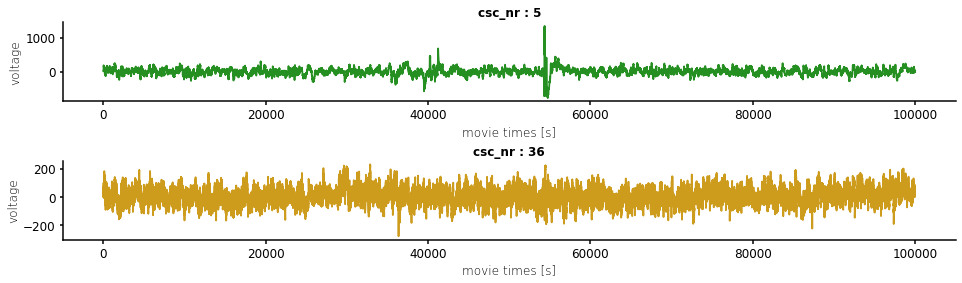

In [4]:
# specify channels to plot
#csc_nrs = df_lfps_compr["csc_nr"].tolist()   # all channels
csc_nrs = [5, 36]     # selected channels
fig1 = plot_lfps(df_lfps, csc_nrs, 0, 100000, "movie_times", "filtered")
fig1.savefig('test.png')
fig1.savefig('test.pdf')

#### 3.2 Plot Spikes

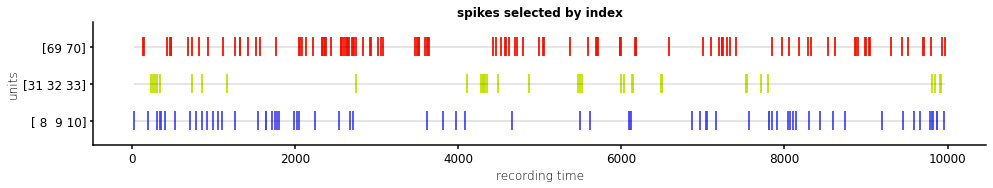

In [5]:
fig2 = plot_spikes(
    df_spikes, 
    [0,1,2], 
    0, 
    10000, 
    df_lfps["movie_times"], 
    "bin1_cnt"
)
fig2.savefig('test.png')
fig2.savefig('test.pdf')

#### 3.3 Plot LFPs with spikes

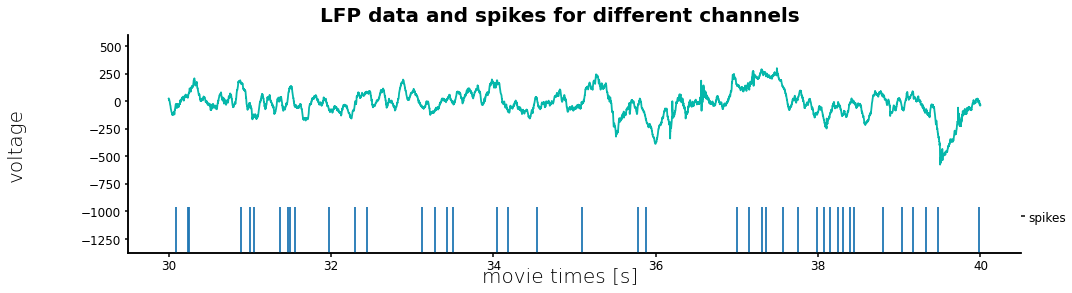

In [17]:
#csc_nrs = df_lfps["csc_nr"].to_numpy()   # all channels
csc_nrs = [5]     # selected channels
fig3 = plot_lfp_with_spikes(
    df_lfps, 
    df_spikes, 
    csc_nrs, 
    30000, 
    40000, 
    "movie_times", 
    "filtered", 
    "bin1_cnt"
)
fig3.savefig('test.png')
fig3.savefig('test.pdf')